<a href="https://colab.research.google.com/github/donib-irakihda/fusemachines-ai-fellowship/blob/main/gradient_descent_for_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## advertisement dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = "https://www.statlearning.com/s/Advertising.csv"

data_df = pd.read_csv(data_path, index_col=0)
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# feature matrix
X = data_df[['TV', 'radio', 'newspaper']].values

# Add column of 1s in X
X = np.c_[np.ones((X.shape[0],1)),X] 

y = data_df['sales'].values.reshape(-1,1)

n = X.shape[0]
d = X.shape[1]

In [4]:
def initialize_betas(X,y):
  np.random.seed(0)
  betas = np.random.randn(d,1)
  return betas
betas = initialize_betas(X, y)
print(betas)

[[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]]


In [5]:
# Cost Function
def calculate_cost(betas):
  cost = 1/2 * np.sum(np.square(np.dot(X, betas)-y))
  return cost
print("COst with random betas: ", calculate_cost(betas))

COst with random betas:  2303714.226243876


In [6]:
# Gradients
def calculate_gradients(betas):
  gradients = np.dot(X.T,(np.dot(X, betas)-y))
  return gradients
print("Gradient for random betas: ", calculate_gradients(betas))

Gradient for random betas:  [[  27563.85598559]
 [4631129.37253468]
 [ 731917.2683292 ]
 [1079270.65268036]]


In [12]:
# Gradient Descent
def gradient_descent(X, y, alpha=0.003, max_iters=10000, precision = 1e-3):
  iteration = 0
  difference =1
  betas = initialize_betas(X, y)
  cost = calculate_cost(betas)
  costs = [calculate_cost(betas)]

  while difference > precision and iteration <= max_iters :
    # update the values of parameters
    betas = betas - alpha * calculate_gradients(betas)

    cost = calculate_cost(betas)

    difference = np.abs(costs[iteration] - cost)
    costs.append(cost)

    print("iteration: {}, costs: {}".format(iteration, cost))
    iteration += 1

    if (cost == np.infty):
      break
    
  return betas, iteration, costs


In [13]:
betas, steps, costs = gradient_descent(X, y)

iteration: 0, costs: 624562462609042.5
iteration: 1, costs: 2.0418880086534106e+23
iteration: 2, costs: 6.676506400718878e+31
iteration: 3, costs: 2.1830649810113797e+40
iteration: 4, costs: 7.138123481955472e+48
iteration: 5, costs: 2.33400321505963e+57
iteration: 6, costs: 7.631657005765802e+65
iteration: 7, costs: 2.495377396134661e+74
iteration: 8, costs: 8.15931369090003e+82
iteration: 9, costs: 2.6679090709738888e+91
iteration: 10, costs: 8.723452830258346e+99
iteration: 11, costs: 2.852369674426854e+108
iteration: 12, costs: 9.326596839463859e+116
iteration: 13, costs: 3.0495839787448227e+125
iteration: 14, costs: 9.971442535251379e+133
iteration: 15, costs: 3.260433781356129e+142
iteration: 16, costs: 1.0660873193649942e+151
iteration: 17, costs: 3.4858618476162146e+159
iteration: 18, costs: 1.1397971441874108e+168
iteration: 19, costs: 3.7268761261614086e+176
iteration: 20, costs: 1.2186033041567329e+185
iteration: 21, costs: 3.984554255714465e+193
iteration: 22, costs: 1.3028

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
betas, steps, costs = gradient_descent(X, y, alpha=0.00000003)

iteration: 0, costs: 1671718.0050467532
iteration: 1, costs: 1246440.9828019056
iteration: 2, costs: 959890.256983694
iteration: 3, costs: 766440.3651914297
iteration: 4, costs: 635475.0950040782
iteration: 5, costs: 546449.909211183
iteration: 6, costs: 485578.6793517403
iteration: 7, costs: 443610.3807171214
iteration: 8, costs: 414337.1854434635
iteration: 9, costs: 393593.34650168754
iteration: 10, costs: 378583.4176656645
iteration: 11, costs: 367431.4681790239
iteration: 12, costs: 358878.5917477492
iteration: 13, costs: 352079.9256441127
iteration: 14, costs: 346468.4441946595
iteration: 15, costs: 341663.55995967134
iteration: 16, costs: 337409.79226923967
iteration: 17, costs: 333535.6118921578
iteration: 18, costs: 329925.82451840554
iteration: 19, costs: 326503.0392073048
iteration: 20, costs: 323215.23313067213
iteration: 21, costs: 320027.40711986506
iteration: 22, costs: 316915.98626972863
iteration: 23, costs: 313865.0625612953
iteration: 24, costs: 310863.8735365154
ite

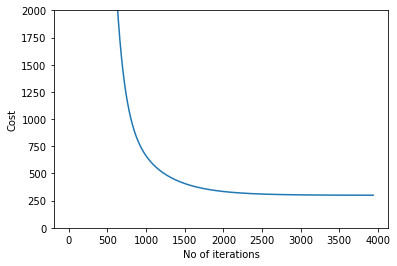

In [18]:
plt.plot(costs)
plt.xlabel("No of iterations")
plt.ylabel("Cost")
plt.ylim(0, 2000)
plt.show()

In [19]:
from IPython.display import display, HTML
message = """<strong>TV, Radio, and Newspaper</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ + {:.2f}$x_{{3}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio <br>
$x_{{3}}$ = newspaper
""".format(*betas[0], *betas[1], *betas[2], *betas[3])
display(HTML( message ))

In [20]:
betas[0]

array([1.7447069])